# Exploratory Data Analysis - EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/data/processed /data_clean.csv', index_col=False)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
# Get summary statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data Vizualisation

The primary objective of exploring the data visually is to discern the features that play a pivotal role in predicting malignant or benign cancer. Additionally, we aim to identify overarching patterns that can inform our decisions regarding model selection and hyperparameter tuning.


In [4]:
# Assuming 'df' is your DataFrame and 'diagnosis' is the column with 'M' and 'B'
#le = LabelEncoder()
#df['diagnosis'] = le.fit_transform(df['diagnosis'])
#df.skew()

<Axes: xlabel='diagnosis', ylabel='count'>

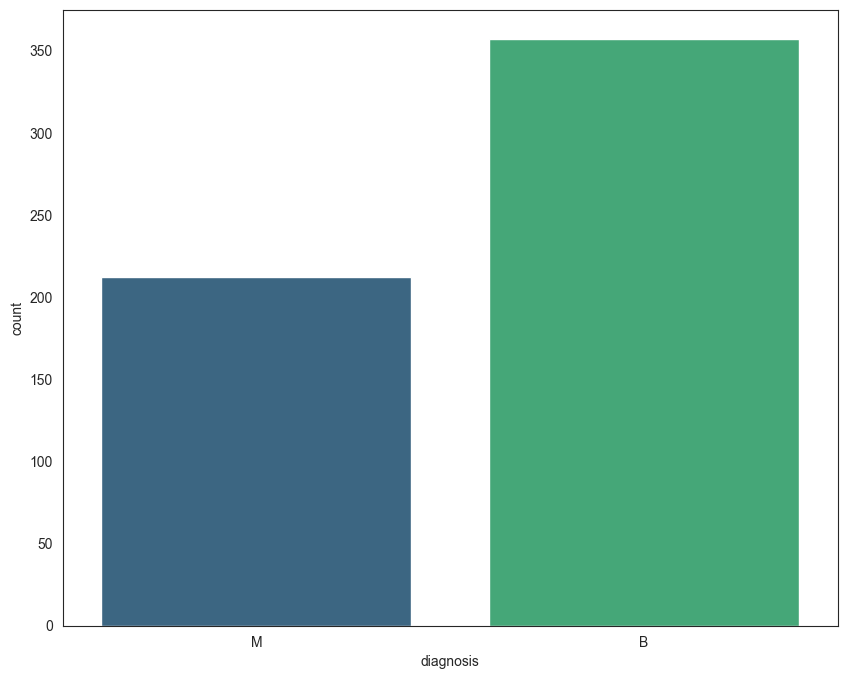

In [5]:
#Get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(x='diagnosis', data=df, label='Count', palette="viridis", hue='diagnosis', legend=False)

Visualizing Data Distribution with Histograms

Key insights obtained from histograms:

Distribution Shape: The shape of the bins offers insights into the nature of the variable's distribution, whether it follows a Gaussian pattern, exhibits skewness, or displays characteristics of an exponential distribution.

Outlier Detection: Histograms assist in identifying potential outliers within the data, providing a visual representation of data points that deviate from the general trend.

Utilizing histograms enhances the understanding of the distributional characteristics of each attribute, aiding in subsequent analysis and decision-making processes.

In [6]:
df.groupby(df.diagnosis).mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


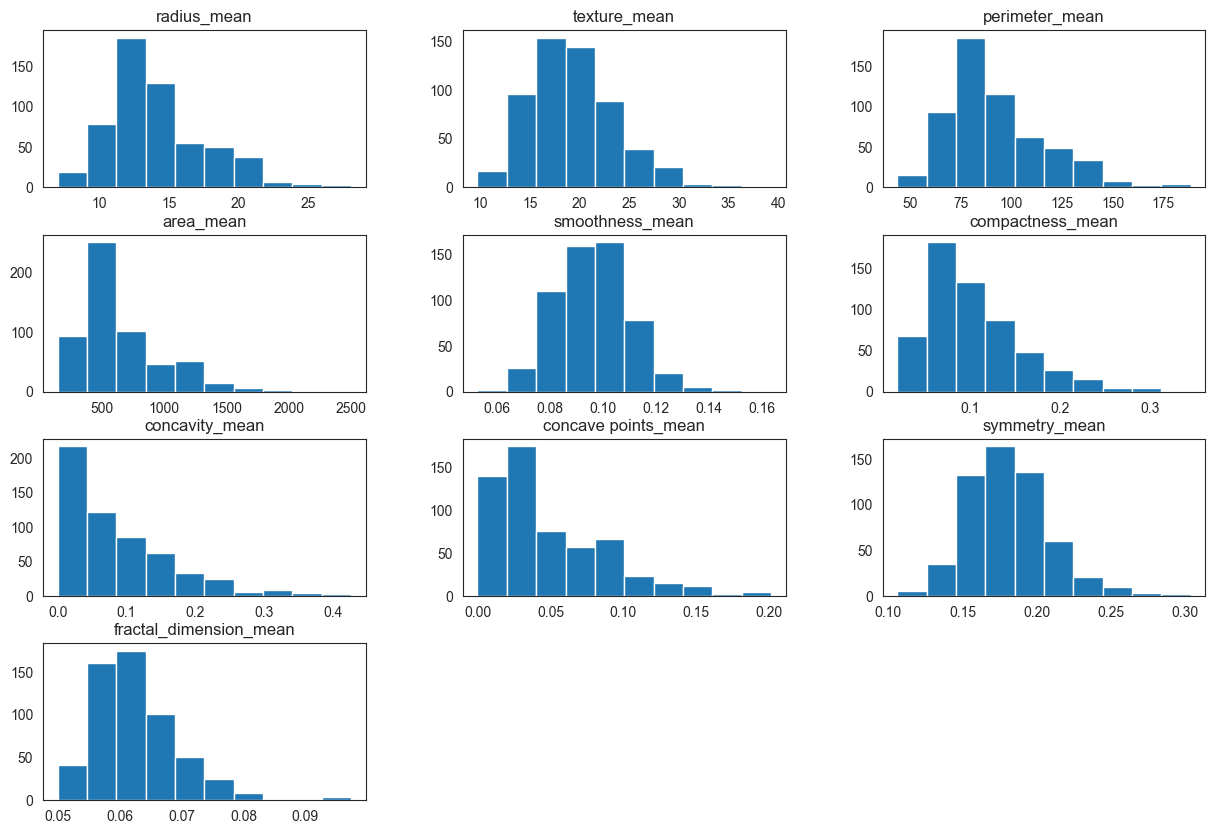

In [7]:
# Extract relevant columns
df_id_diag = df[['id', 'diagnosis']]
df_diag = df[['diagnosis']]

# Use filter to separate columns based on suffix
df_mean = df.filter(regex='_mean$', axis=1)
df_se = df.filter(regex='_se$', axis=1)
df_worst = df.filter(regex='_worst$', axis=1)
#Plot histograms of CUT1 variables
hist_mean=df_mean.hist(bins=10, figsize=(15, 10),grid=False,)

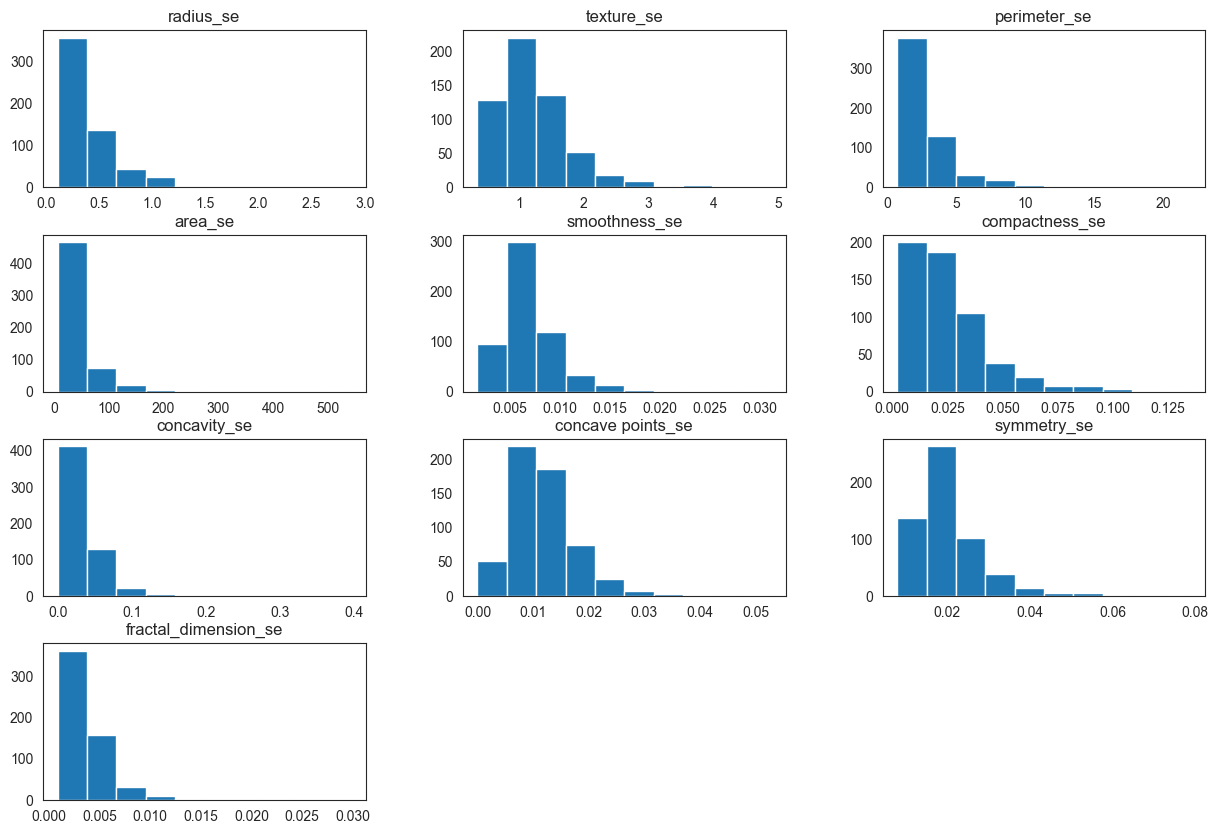

In [8]:
#Plot histograms of _se variables
hist_se=df_se.hist(bins=10, figsize=(15, 10),grid=False,)

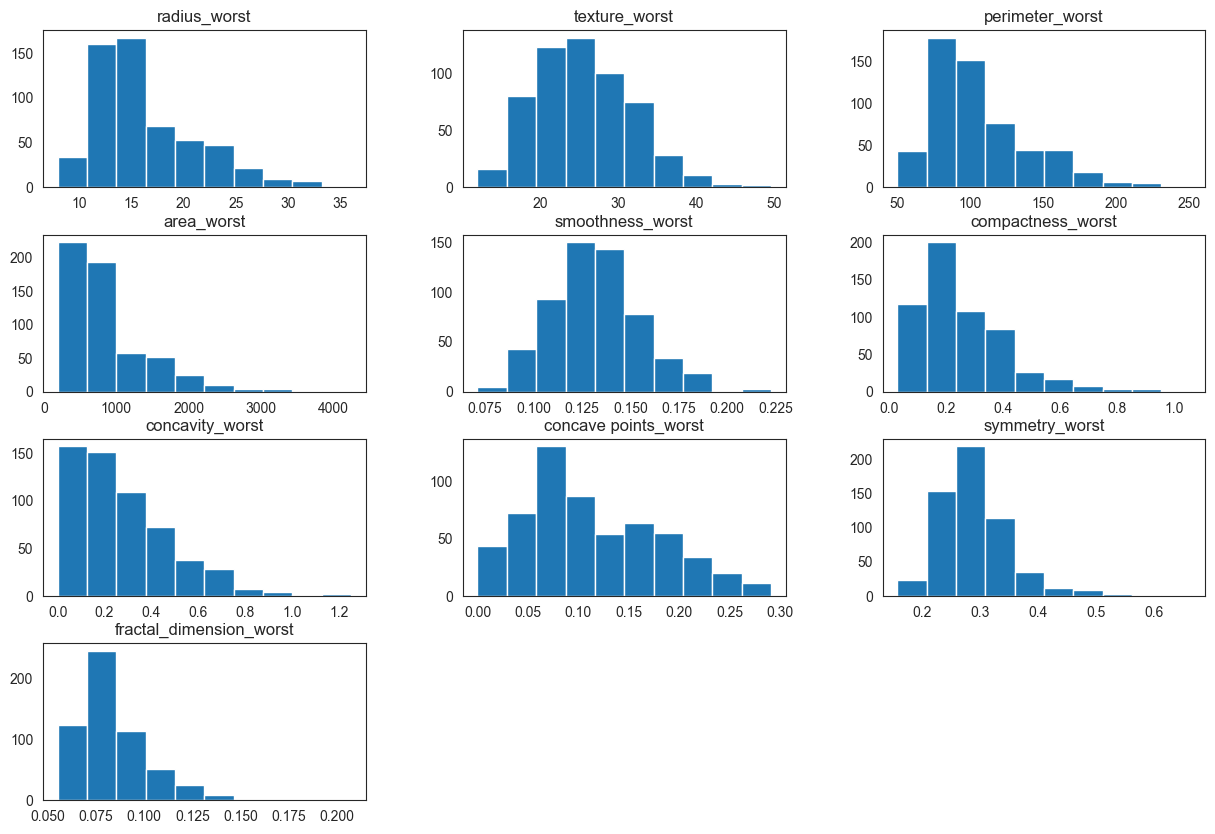

In [9]:
#Plot histograms of _worst variables
hist_worst=df_worst.hist(bins=10, figsize=(15, 10),grid=False,)

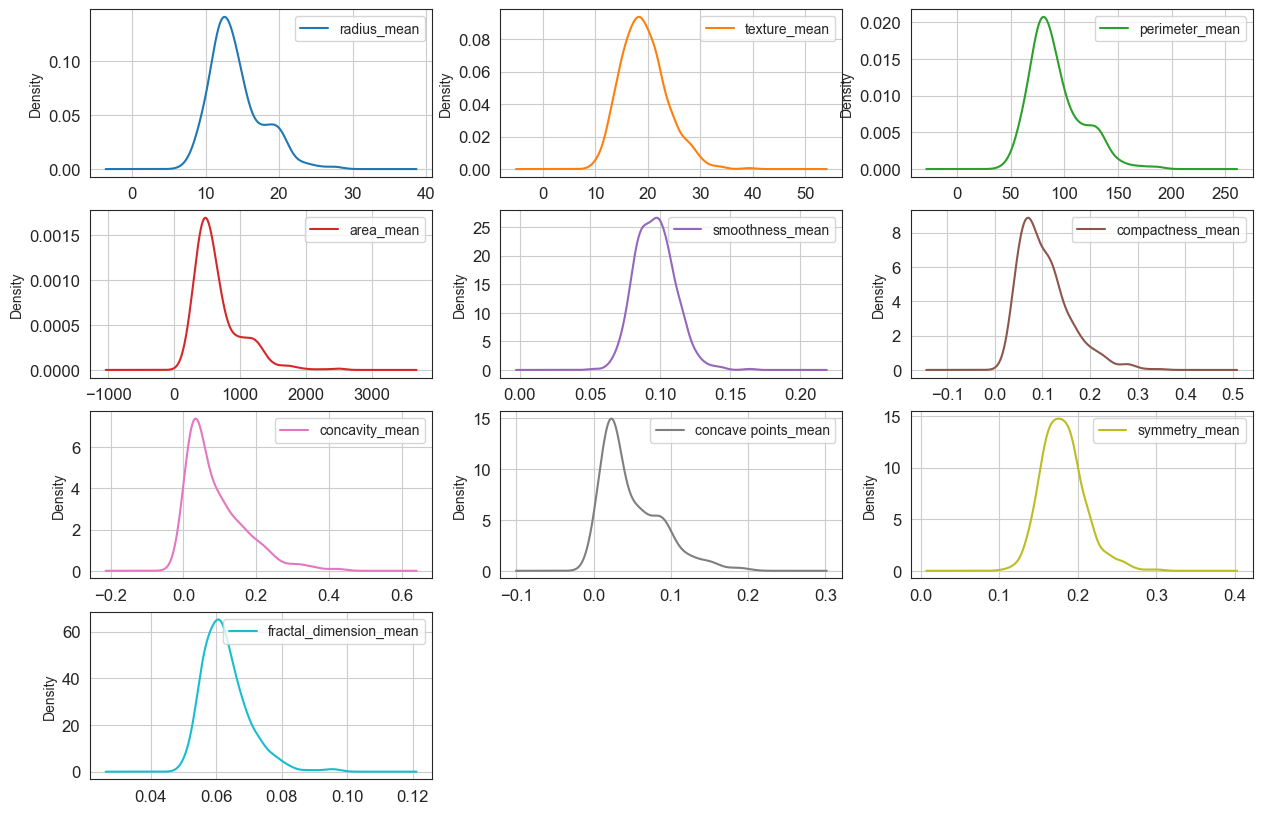

In [10]:
#Density Plots
plt = df_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                     sharey=False, fontsize=12, figsize=(15,10), grid=True)

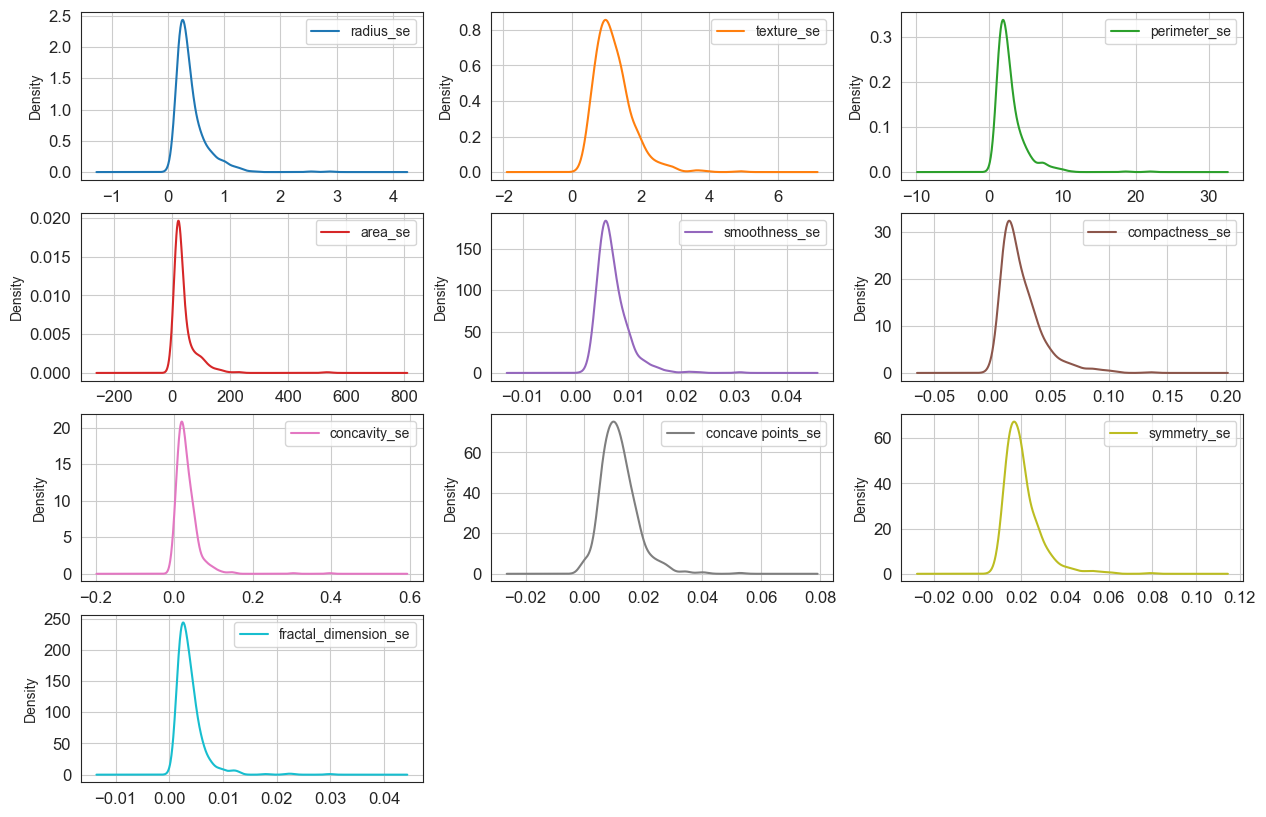

In [11]:
#Density Plots
plt = df_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                    sharey=False, fontsize=12, figsize=(15,10), grid=True)

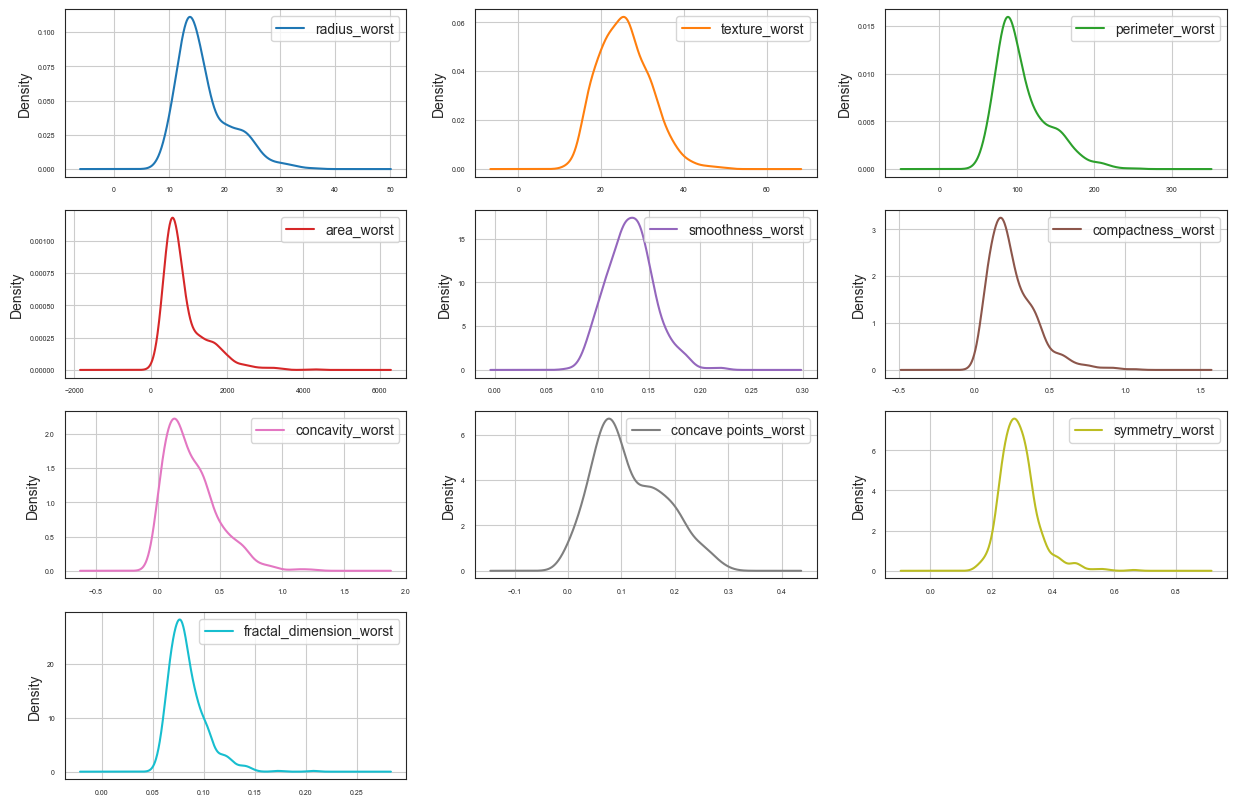

In [12]:
#Density Plots
plt = df_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,
                    fontsize=5, figsize=(15,10), grid=True)

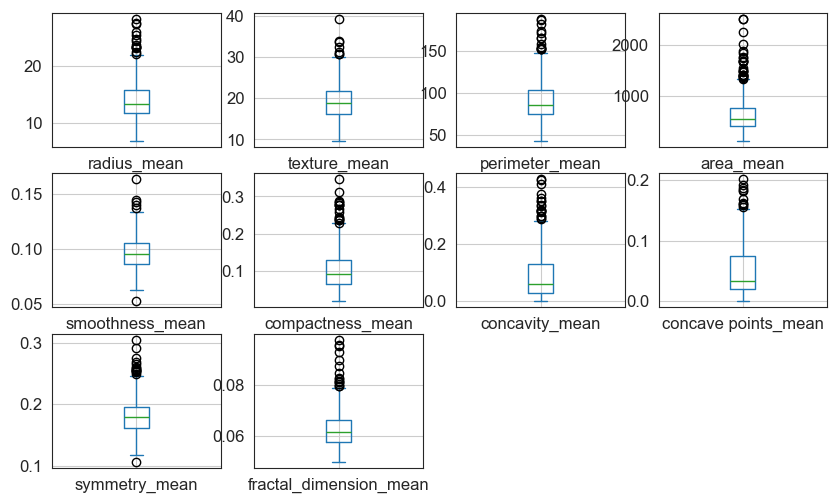

In [13]:
# box and whisker plots
plt=df_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                 fontsize=12, grid=True)

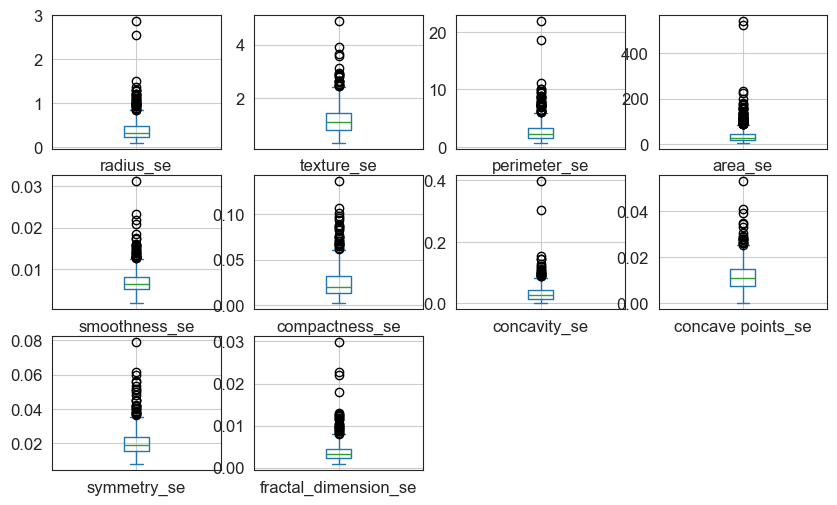

In [14]:
# box and whisker plots
plt=df_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
               fontsize=12, grid=True)

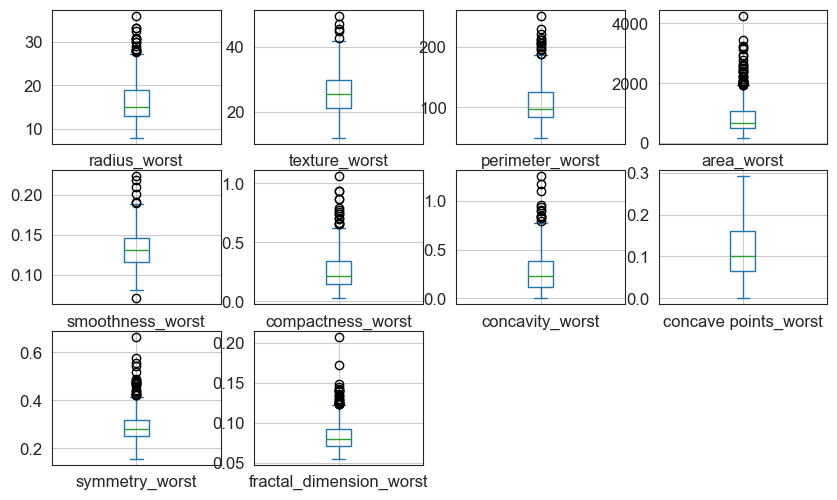

In [15]:
# box and whisker plots
plt=df_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                  fontsize=12, grid=True)

Correlation Analysis

AttributeError: 'Series' object has no attribute 'show'

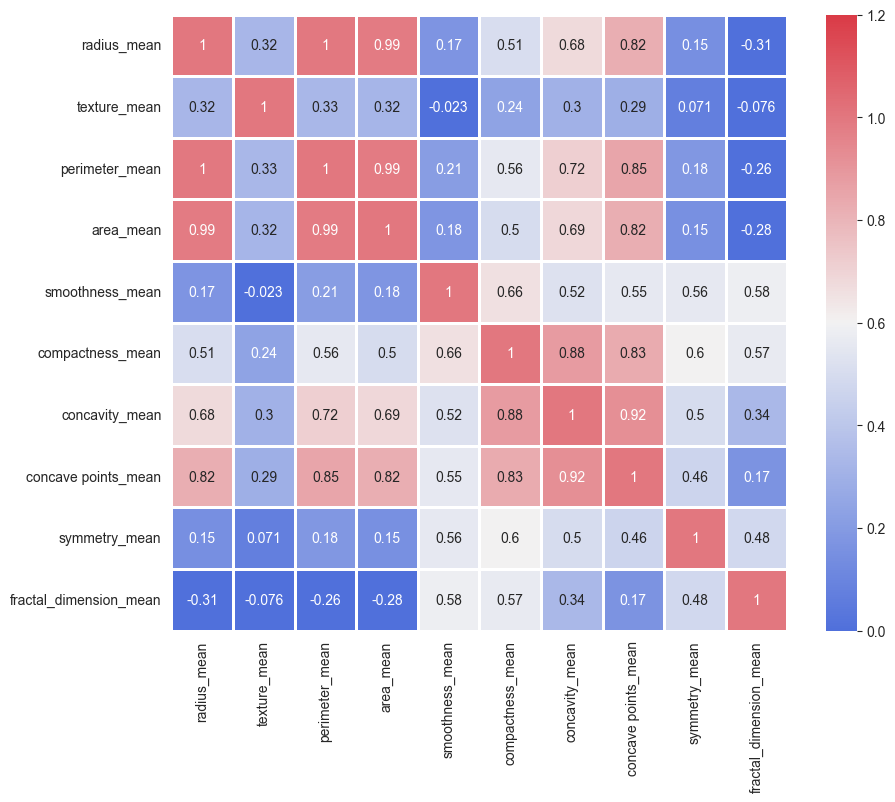

In [16]:
# Load your data
df = pd.read_csv('/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/data/processed /data_clean.csv', index_col=0)  # Assuming 'id' is the first column

# Encode the 'diagnosis' column
df['diagnosis'] = df['diagnosis']

# Compute the correlation matrix
corr = df_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,vmin=0, vmax=1.2, square=True, cmap=cmap, annot=True, fmt='.2g', linewidths=2)

plt.show()

AttributeError: 'Series' object has no attribute 'suptitle'

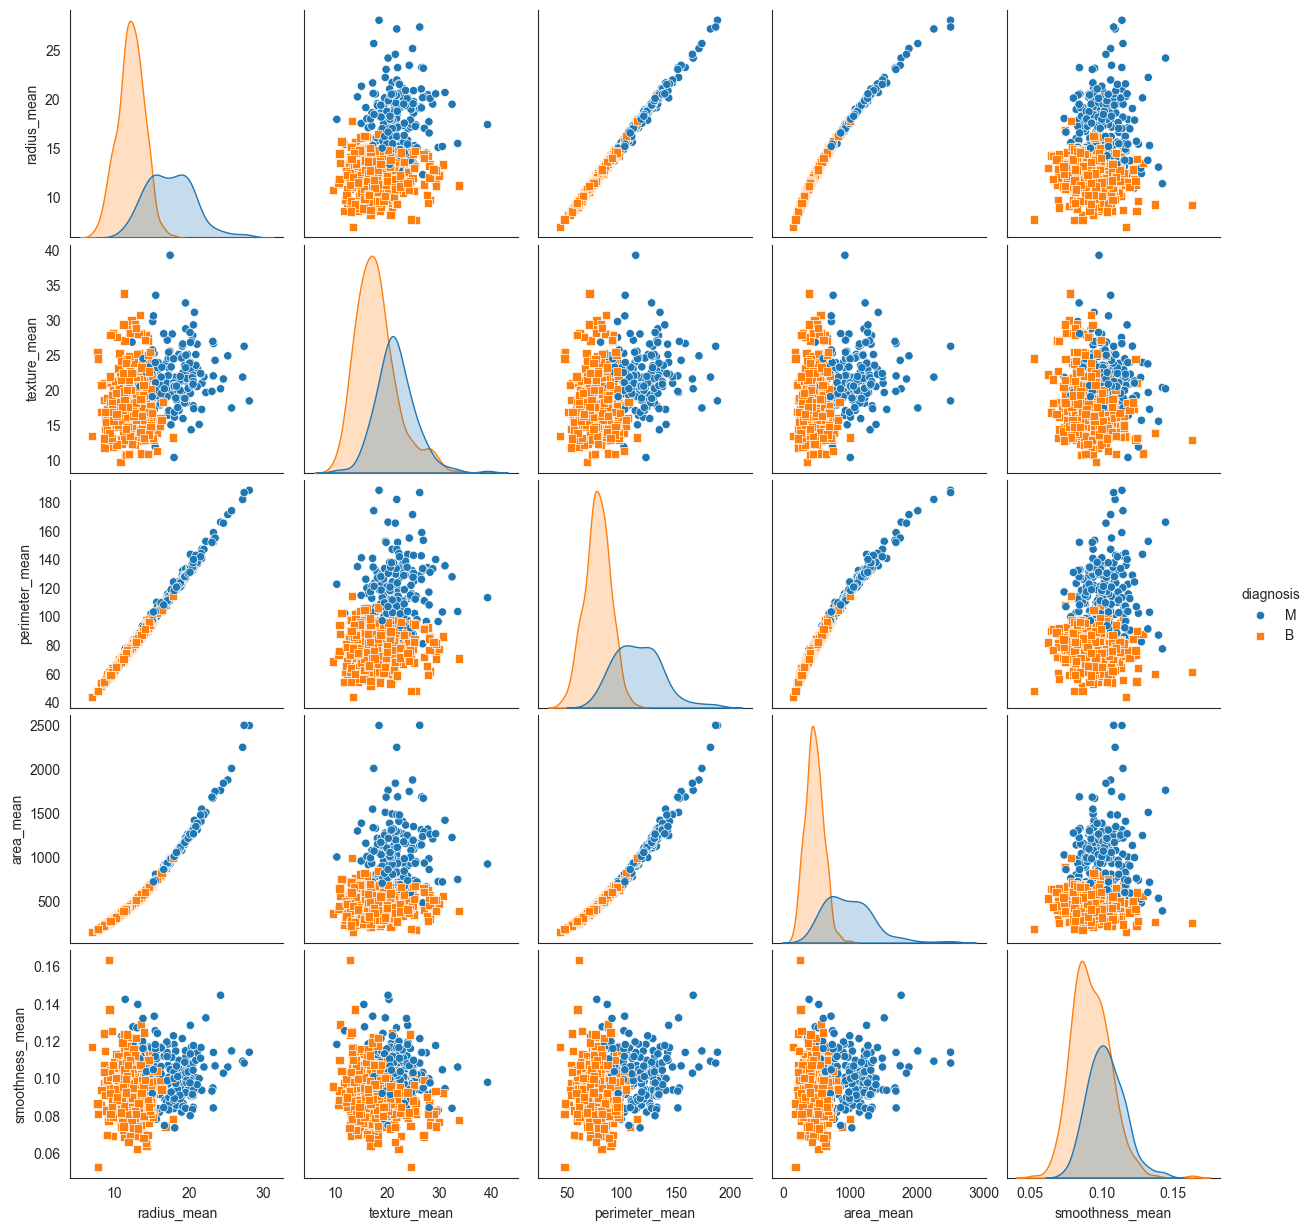

In [17]:
df = pd.read_csv('/Users/oumaymabamoh/PycharmProjects/BreastCancerPrediction/data/processed /data_clean.csv', index_col=0)

# Encode the 'diagnosis' column
df['diagnosis'] = df['diagnosis']

# Specify the columns for the pairplot
selected_features = ['radius_mean', 'texture_mean','perimeter_mean', 'area_mean','smoothness_mean']

# Create a pairplot
sns.pairplot(df, hue='diagnosis', vars=selected_features, markers=["o", "s"])
plt.suptitle('Pairwise Scatter Plots for Selected Features', y=1.02)
plt.show()

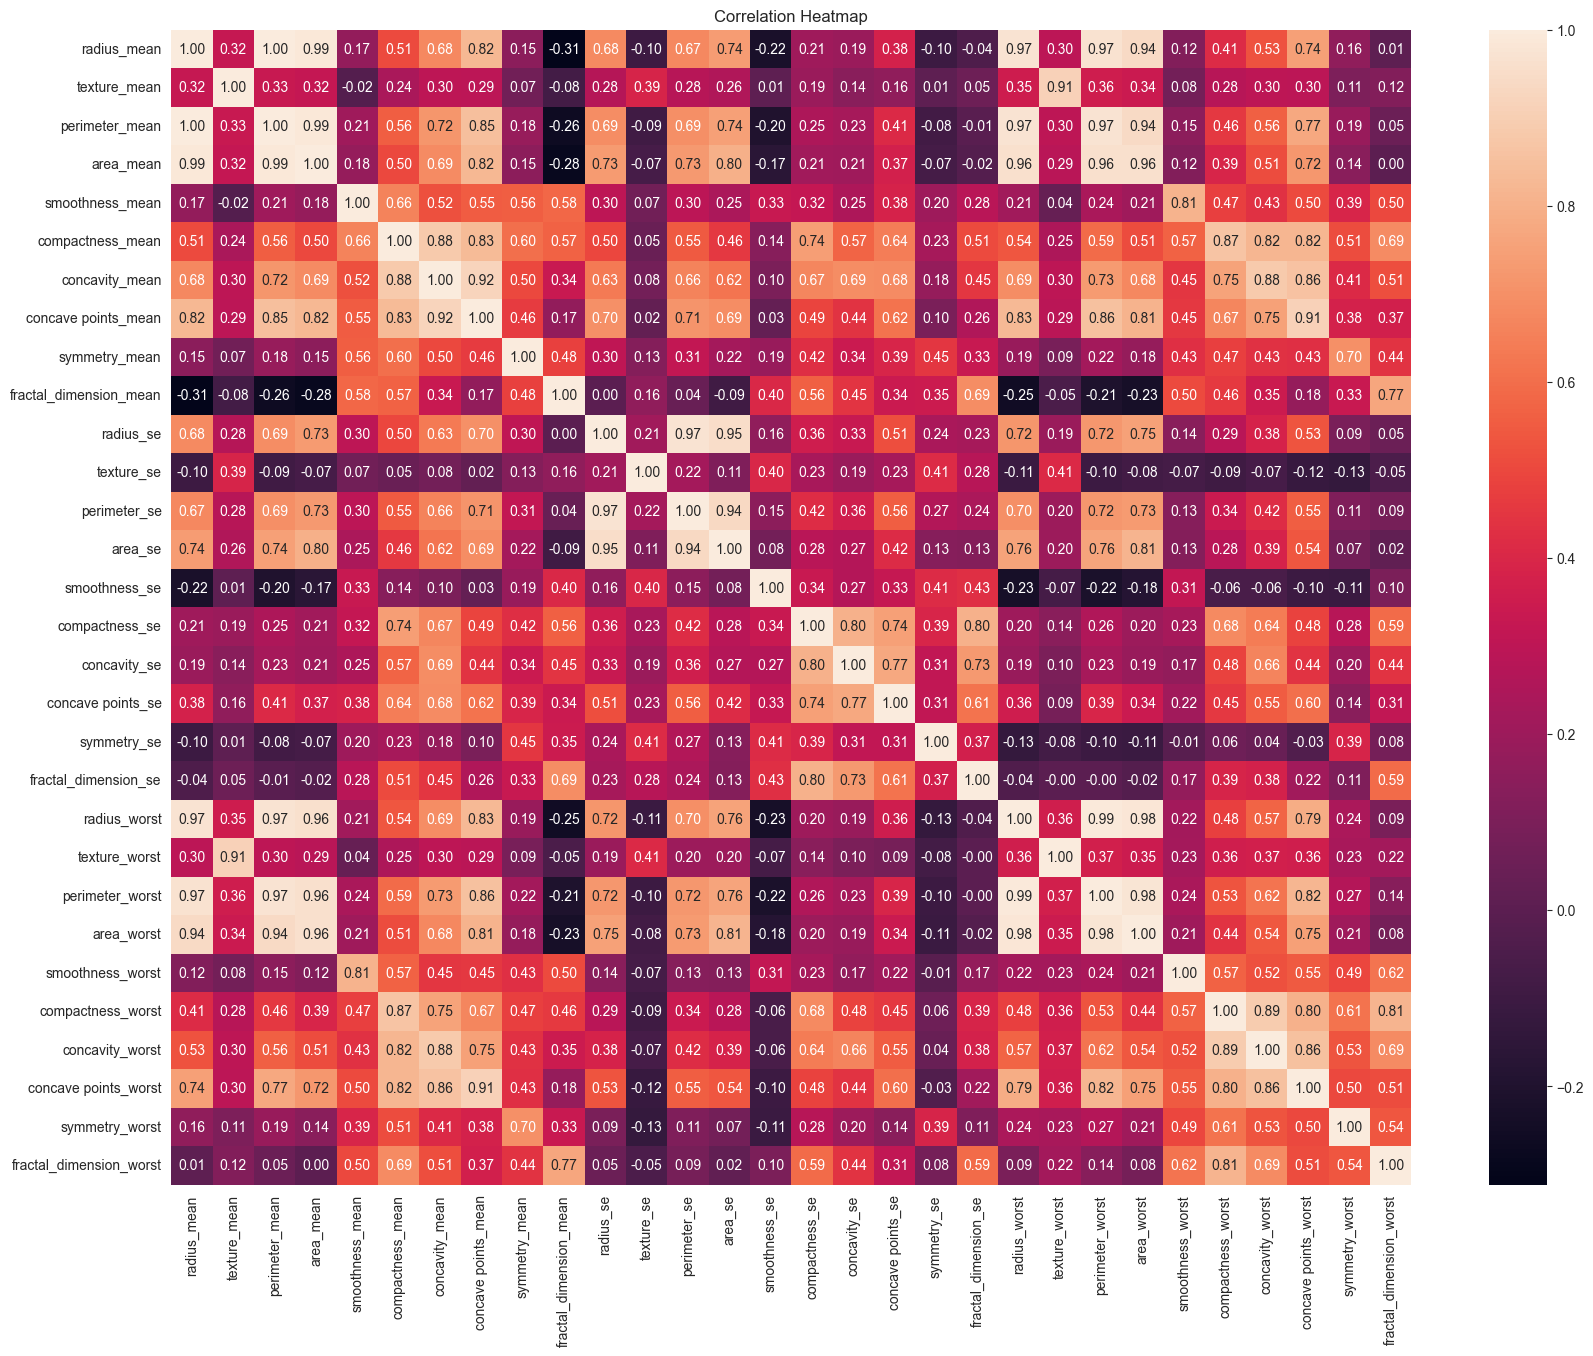

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = df.select_dtypes(include='number')
# Correlation heatmap of numeric features
plt.figure(figsize=(20, 15))
correlation = numeric_columns.corr()
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Splitting the dataset

In [19]:
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis'].map(lambda x: 1 if x == 'M' else 0)

In [20]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [21]:
y

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
           ..
926424      1
926682      1
926954      1
927241      1
92751       0
Name: diagnosis, Length: 569, dtype: int64

Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [23]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
8510824,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773
894604,10.250,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.03965,0.1743,0.07279,...,11.28,20.61,71.53,390.4,0.1402,0.2360,0.18980,0.09744,0.2608,0.09702
868871,11.280,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
90401601,13.510,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.05381,0.1806,0.06079,...,14.80,27.20,97.33,675.2,0.1428,0.2570,0.34380,0.14530,0.2666,0.07686
868223,11.710,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.02600,0.1339,0.05945,...,13.33,25.48,86.16,546.7,0.1271,0.1028,0.10460,0.06968,0.1712,0.07343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859464,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.01504,0.1717,0.06899,...,10.41,31.56,67.03,330.7,0.1548,0.1664,0.09412,0.06517,0.2878,0.09211
857793,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,...,17.87,30.70,115.70,985.5,0.1368,0.4290,0.35870,0.18340,0.3698,0.10940
908469,14.860,16.94,94.89,673.7,0.08924,0.07074,0.03346,0.02877,0.1573,0.05703,...,16.31,20.54,102.30,777.5,0.1218,0.1550,0.12200,0.07971,0.2525,0.06827


In [24]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
846226,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.3639,0.17670,0.3176,0.10230
878796,23.29,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,0.2200,0.06229,...,25.12,32.68,177.00,1986.0,0.1536,0.4167,0.7892,0.27330,0.3198,0.08762
8711561,11.75,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.03738,0.1993,0.06453,...,13.32,26.21,88.91,543.9,0.1358,0.1892,0.1956,0.07909,0.3168,0.07987
873885,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.3630,0.12260,0.3175,0.09772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010258,12.56,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.04391,0.1533,0.06184,...,13.37,22.43,89.02,547.4,0.1096,0.2002,0.2388,0.09265,0.2121,0.07188
908489,13.98,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.04,30.80,113.90,869.3,0.1613,0.3568,0.4069,0.18270,0.3179,0.10550
888264,17.35,23.06,111.00,933.1,0.08662,0.06290,0.02891,0.02837,0.1564,0.05307,...,19.85,31.47,128.20,1218.0,0.1240,0.1486,0.1211,0.08235,0.2452,0.06515


In [25]:
y_train

id
8510824     0
894604      0
868871      0
90401601    0
868223      0
           ..
859464      0
857793      1
908469      0
857637      1
90312       1
Name: diagnosis, Length: 455, dtype: int64

Scaling  data

In [26]:
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [28]:
X_train

array([[-1.30489796, -1.57962574, -1.2927886 , ..., -0.79147943,
        -0.72054742, -0.34572479],
       [-1.09388267, -0.71010933, -1.03964591, ..., -0.26023593,
        -0.46514653,  0.7133097 ],
       [-0.80253448, -1.35875927, -0.77421474, ..., -0.43137579,
        -1.28307597, -0.8886927 ],
       ...,
       [ 0.21011262, -0.53341615,  0.12243467, ..., -0.52804791,
        -0.59931282, -0.8650854 ],
       [ 1.4405637 , -0.15445579,  1.37626924, ...,  1.42639042,
         1.03654608, -0.05969214],
       [ 1.53673688,  0.92430254,  1.51553868, ...,  1.02459693,
        -0.51687329, -0.43960498]])

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

Model

In [30]:
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [31]:
array = df.values
X = array[:,1:31]
y = array[:,0]
# Print each row of X in a new line
for row in X:
    print(row)

[17.99 10.38 122.8 1001.0 0.1184 0.2776 0.3001 0.1471 0.2419 0.07871 1.095
 0.9053 8.589 153.4 0.006399 0.04904 0.05373 0.01587 0.03003 0.006193
 25.38 17.33 184.6 2019.0 0.1622 0.6656 0.7119 0.2654 0.4601 0.1189]
[20.57 17.77 132.9 1326.0 0.08474 0.07864 0.0869 0.07017 0.1812 0.05667
 0.5435 0.7339 3.398 74.08 0.005225 0.01308 0.0186 0.0134 0.01389 0.003532
 24.99 23.41 158.8 1956.0 0.1238 0.1866 0.2416 0.186 0.275 0.08902]
[19.69 21.25 130.0 1203.0 0.1096 0.1599 0.1974 0.1279 0.2069 0.05999
 0.7456 0.7869 4.585 94.03 0.00615 0.04006 0.03832 0.02058 0.0225 0.004571
 23.57 25.53 152.5 1709.0 0.1444 0.4245 0.4504 0.243 0.3613 0.08758]
[11.42 20.38 77.58 386.1 0.1425 0.2839 0.2414 0.1052 0.2597 0.09744 0.4956
 1.156 3.445 27.23 0.00911 0.07458 0.05661 0.01867 0.05963 0.009208 14.91
 26.5 98.87 567.7 0.2098 0.8663 0.6869 0.2575 0.6638 0.173]
[20.29 14.34 135.1 1297.0 0.1003 0.1328 0.198 0.1043 0.1809 0.05883 0.7572
 0.7813 5.438 94.44 0.01149 0.02461 0.05688 0.01885 0.01756 0.005115 22.54

In [32]:
le = LabelEncoder()
y = le.fit_transform(y)
# Print the transformed labels
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [33]:
##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [34]:
# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

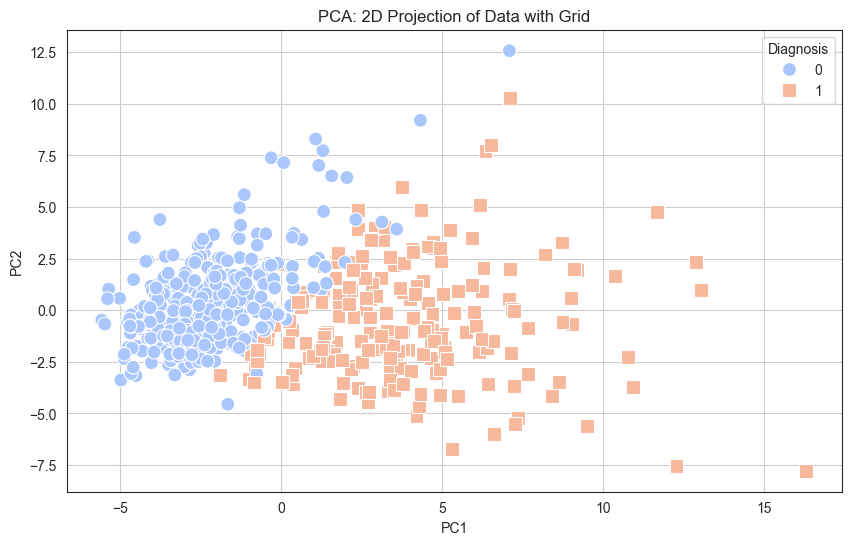

In [35]:
import matplotlib.pyplot as plt
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_standardized)

# Create a DataFrame with the principal components and the target variable
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Diagnosis'] = y

# Visualize the data in 2D using PCA components with grid
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Diagnosis', data=pca_df, palette='coolwarm', style='Diagnosis', markers=['o', 's'], s=100)
plt.title('PCA: 2D Projection of Data with Grid')
plt.grid(True)
plt.show()

In [36]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

[44.27 63.24]


Visualizing Explained Variance


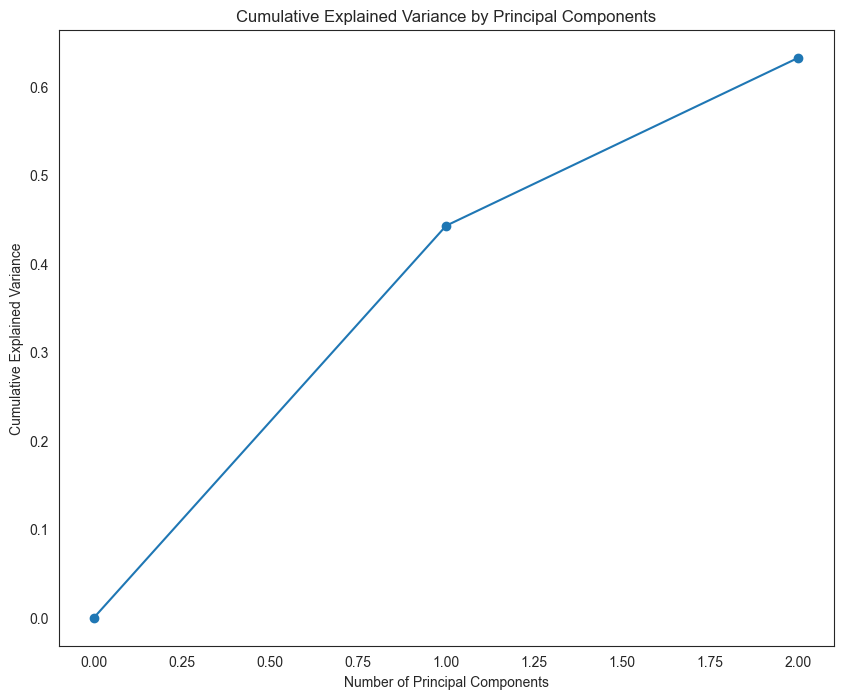

In [37]:
# Visualize explained variance by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.plot([0] + list(range(1, len(explained_variance_ratio) + 1)), [0] + list(cumulative_explained_variance), marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()